# Partial Visual Overview of Labs for 6007

In order to run this notebook, you will need to install the [Graphviz](http://graphviz.org/) app:

    brew install graphviz

And Python's [graphviz](http://graphviz.readthedocs.io/en/latest/) library:

    conda install graphviz

## Lab 1.1: Intro

In the first lab, we will be creating a script that writes a file to a static website on S3:

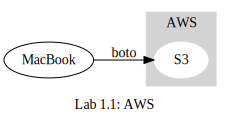

In [1]:
from graphviz import Digraph

g = Digraph(comment='Data Model')
g.graph_attr['rankdir'] = 'LR'
g.body.append(r'label = "Lab 1.1: AWS"')

aws = Digraph('cluster_0')
aws.body.append('style=filled')
aws.body.append('color=lightgrey')
aws.node_attr.update(style='filled', color='white')
aws.body.append('label = "AWS"')
aws.node('S3')

g.subgraph(aws)

g.edge('MacBook', 'S3', 'boto')

g

## Lab 1.2: The Internet

In the second lab, we will add a component that pulls data from a 3rd party REST API (namely, Twitter) and publishes that data to the website we built the day before.

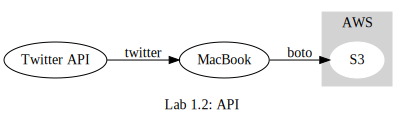

In [2]:
g.body.append(r'label = "Lab 1.2: API"')

g.edge('Twitter API', 'MacBook', 'twitter')

g

## Lab 2.1: Virtualization

In this lab, we will be creating our own web server using a locally hosted Linux virtual machine.

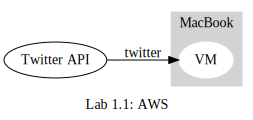

In [3]:
g = Digraph(comment='Data Model')
g.graph_attr['rankdir'] = 'LR'
g.body.append(r'label = "Lab 1.1: AWS"')

aws = Digraph('cluster_0')
aws.body.append('style=filled')
aws.body.append('color=lightgrey')
aws.node_attr.update(style='filled', color='white')
aws.body.append('label = "MacBook"')
aws.node('VM')

g.subgraph(aws)

g.edge('Twitter API', 'VM', 'twitter')

g

## Lab 2.2: Linux

## Lab 2.3: Elastic Cloud Compute

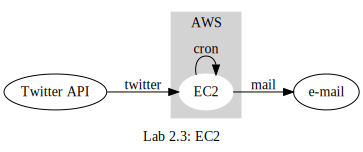

In [4]:
g = Digraph(comment='Data Model')
g.graph_attr['rankdir'] = 'LR'
g.body.append(r'label = "Lab 2.3: EC2"')

aws = Digraph('cluster_0')
aws.body.append('style=filled')
aws.body.append('color=lightgrey')
aws.node_attr.update(style='filled', color='white')
aws.body.append('label = "AWS"')
# aws.node('S3')
aws.node('EC2')

g.subgraph(aws)

# g.edge('EC2', 'S3', 'boto')
g.edge('EC2', 'EC2', 'cron')
g.edge('Twitter API', 'EC2', 'twitter')
g.edge('EC2', 'e-mail', 'mail')

g

## Lab 2.4: MongoDB

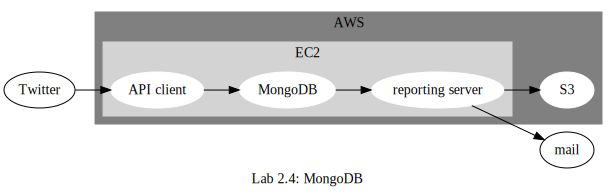

In [5]:
g = Digraph('G')
g.graph_attr['rankdir'] = 'LR'
g.body.append(r'label = "Lab 2.4: MongoDB"')

aws = Digraph('cluster_0')
ec2 = Digraph('cluster_1')

aws.body.append('style=filled')
aws.body.append('color=grey')
aws.node_attr.update(style='filled', color='white')
aws.body.append('label = "AWS"')

ec2.node_attr.update(style='filled')
ec2.node('EC2a', 'API client')
ec2.node('EC2a', 'API client')
ec2.node('EC2b', 'MongoDB')
ec2.node('EC2c', 'reporting server')
ec2.edges([('EC2a', 'EC2b'), ('EC2b', 'EC2c')])
ec2.body.append('label = "EC2"')
ec2.body.append('color=lightgrey')

aws.subgraph(ec2)
aws.edge('EC2c', 'S3')

g.subgraph(aws)

g.edge('Twitter', 'EC2a')
g.edge('EC2c', 'mail')

g